In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import xgboost as xgb
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping
import time
import os
from typing import Dict, List, Tuple
from tensorflow.keras import layers, models
from typing import List, Dict, Tuple, Optional
from pathlib import Path



In [2]:
df = pd.read_csv("/Users/sohinikar/FL/M.Tech_Dissertation/Obfuscated-MalMem2022_train_and_test.csv")
df.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
1,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
2,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign
4,Benign,40,12,13.800000,0,306.950000,2082,52.050000,12278,306.950000,...,222,26,27,118,0,123,88,0,8,Benign


In [3]:
df.shape

(52708, 57)

In [4]:
df.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,52708.000000,52708.000000,52708.000000,52708.0,52708.000000,52708.000000,52708.000000,5.270800e+04,52708.000000,52708.0,...,52708.000000,52708.000000,52708.000000,52708.000000,52708.000000,52708.0,52708.000000,52708.000000,52708.000000,52708.000000
mean,41.398972,14.721731,11.338282,0.0,247.386149,1810.511023,43.694839,1.025501e+04,249.447942,0.0,...,391.341011,221.405916,25.996338,25.059308,116.877552,0.0,121.994574,86.903127,0.000797,7.999886
std,5.779682,2.655174,1.587059,0.0,116.714088,329.846663,5.737274,5.066323e+03,153.023360,0.0,...,4.522731,1.985979,0.165994,1.528529,1.553418,0.0,2.825147,3.134089,0.028217,0.010669
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.971429,0.0,208.700000,1556.000000,38.829268,8.393000e+03,209.634146,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.759132,1730.000000,42.731409,9.275500e+03,246.794279,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.858038,0.0,289.728806,2087.000000,49.563324,1.219200e+04,291.287373,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


In [5]:
df.shape

(52708, 57)

# Data Cleaning

In [6]:
# checking all the values in the columns are indetical
for column in df.columns:
    if df[column].nunique() == 1:
        print(f"All values in {column} are identical.")

All values in pslist.nprocs64bit are identical.
All values in handles.nport are identical.
All values in svcscan.interactive_process_services are identical.


In [7]:
columns_to_drop = ['pslist.nprocs64bit', 'handles.nport', 'svcscan.interactive_process_services']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [8]:
#checking for columns with null values

null_columns = df.columns[df.isnull().any()]
print("Columns with nulls:", list(null_columns))

Columns with nulls: []


# Encoding

In [9]:
df['Class'] = df['Class'].map({'Benign': 0, 'Malware': 1}) if df['Class'].dtype == 'object' else df['Class']

# sanity check of data before splitting

In [10]:
print("\nData Info:")
print(df.info())
print("\nFirst Few Rows:")
print(df.head())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52708 entries, 0 to 52707
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                52708 non-null  object 
 1   pslist.nproc                            52708 non-null  int64  
 2   pslist.nppid                            52708 non-null  int64  
 3   pslist.avg_threads                      52708 non-null  float64
 4   pslist.avg_handlers                     52708 non-null  float64
 5   dlllist.ndlls                           52708 non-null  int64  
 6   dlllist.avg_dlls_per_proc               52708 non-null  float64
 7   handles.nhandles                        52708 non-null  int64  
 8   handles.avg_handles_per_proc            52708 non-null  float64
 9   handles.nfile                           52708 non-null  int64  
 10  handles.nevent                          52708 

In [11]:
print("DataFrame Shape:", df.shape)
print("Class Distribution:", df["Class"].value_counts())

DataFrame Shape: (52708, 54)
Class Distribution: Class
1    26388
0    26320
Name: count, dtype: int64


In [12]:
X = df.drop(columns=['Class','Category'])
y = df["Class"]

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Steep rise initially:
The first ~10 components capture a large portion of the total variance — roughly 90–95%.
This means most of the useful information is concentrated in those first few components.

Elbow point (approx at component 10–15):
After ~15 components, the curve flattens — additional components add very little new information (variance).

Plateau near 1.0:
Around 20–25 components, you reach nearly 100% variance retained, so including more components beyond that is redundant.

# Splitting the data

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=7)

In [15]:
X_test.shape

(15813, 52)

# Feedforward Neural Network for Binary Classification (FNN-BC)

In [16]:
early_stop = EarlyStopping(
    monitor="accuracy",      # or "val_accuracy"
    mode="max",
    patience=0,              # stop as soon as it stops improving
    min_delta=0.0,           # minimum change
    verbose=1
)

In [17]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(52,)),  # 52 input features
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'),  # hidden layer 1
    tf.keras.layers.Dropout(0.5),  # dropout to avoid overfitting
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'),  # hidden layer 2
    tf.keras.layers.Dropout(0.5),  # dropout to avoid overfitting
    tf.keras.layers.Dense(1, activation='sigmoid')  # output layer for binary classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # optimizer
    loss='binary_crossentropy',            # binary classification loss
    metrics=['accuracy', tf.keras.metrics.Recall()]  # metrics
)

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 651 (2.54 KB)

 Trainable params: 651 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
full_start = time.time()
model.fit(X_train, y_train,
          epochs=30,
          batch_size=64,
          callbacks=[early_stop]
)
full_end = time.time()
print(f"Training time = {full_end - full_start:.3f} seconds")

Epoch 1/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 3:39 380ms/step - accuracy: 0.5000 - loss: 0.8586 - recall: 0.5294

117/577 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.5677 - loss: 0.7920 - recall: 0.6551  

273/577 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.6162 - loss: 0.7182 - recall: 0.6800

430/577 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.6527 - loss: 0.6657 - recall: 0.7017

577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 356us/step - accuracy: 0.6814 - loss: 0.6263 - recall: 0.7230


Epoch 2/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9219 - loss: 0.3245 - recall: 0.9394

157/577 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.9138 - loss: 0.3040 - recall: 0.9325

316/577 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.9181 - loss: 0.2866 - recall: 0.9345

472/577 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.9220 - loss: 0.2721 - recall: 0.9371

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.9241 - loss: 0.2641 - recall: 0.9386


Epoch 3/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9375 - loss: 0.1638 - recall: 0.9355

157/577 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.9539 - loss: 0.1687 - recall: 0.9557

315/577 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.9550 - loss: 0.1653 - recall: 0.9578

472/577 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.9554 - loss: 0.1620 - recall: 0.9587

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.9556 - loss: 0.1616 - recall: 0.9592


Epoch 4/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9844 - loss: 0.1486 - recall: 0.9688

157/577 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.9642 - loss: 0.1328 - recall: 0.9659

315/577 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.9638 - loss: 0.1363 - recall: 0.9652

474/577 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.9644 - loss: 0.1388 - recall: 0.9660

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.9648 - loss: 0.1383 - recall: 0.9664


Epoch 5/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9688 - loss: 0.0846 - recall: 0.9429

155/577 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.9706 - loss: 0.1448 - recall: 0.9737

313/577 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.9716 - loss: 0.1338 - recall: 0.9749

469/577 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.9723 - loss: 0.1276 - recall: 0.9755

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.9726 - loss: 0.1245 - recall: 0.9757


Epoch 6/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9844 - loss: 0.0858 - recall: 0.9697

157/577 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.9803 - loss: 0.0908 - recall: 0.9790

317/577 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.9786 - loss: 0.0953 - recall: 0.9777

475/577 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.9779 - loss: 0.0961 - recall: 0.9769

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.9777 - loss: 0.0962 - recall: 0.9767


Epoch 7/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 0.0488 - recall: 1.0000

154/577 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.9829 - loss: 0.1553 - recall: 0.9774

312/577 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.9816 - loss: 0.1286 - recall: 0.9766

468/577 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.9814 - loss: 0.1176 - recall: 0.9768

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.9814 - loss: 0.1128 - recall: 0.9772


Epoch 8/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9688 - loss: 0.1024 - recall: 1.0000

155/577 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.9791 - loss: 0.0921 - recall: 0.9762

312/577 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.9811 - loss: 0.0866 - recall: 0.9782

472/577 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.9820 - loss: 0.0847 - recall: 0.9792

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.9823 - loss: 0.0839 - recall: 0.9796


Epoch 9/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9688 - loss: 0.0674 - recall: 0.9697

157/577 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.9802 - loss: 0.0834 - recall: 0.9734

316/577 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.9813 - loss: 0.0828 - recall: 0.9755

475/577 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.9819 - loss: 0.0817 - recall: 0.9767

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.9821 - loss: 0.0810 - recall: 0.9771


Epoch 9: early stopping


Training time = 2.197 seconds


## LSTM-BC: Long Short-Term Memory for Binary Classification

In [19]:
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1])).astype(np.float32)
X_test_lstm  = X_test.reshape((X_test.shape[0], 1, X_test.shape[1])).astype(np.float32)

In [20]:
y_train = np.asarray(y_train).astype(np.float32)
y_test  = np.asarray(y_test).astype(np.float32)

In [21]:
lstm_bc = tf.keras.Sequential([
    tf.keras.Input(shape=(1, 52)),                # (timesteps, 52 features)
    tf.keras.layers.LSTM(13, activation='relu'),     # outputs 13-d vector
    tf.keras.layers.Dense(1, activation='sigmoid')   # binary output
])

lstm_bc.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall(name="recall")]
)

lstm_bc.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 13)             │         3,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,446 (13.46 KB)

 Trainable params: 3,446 (13.46 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
full_start = time.time()
lstm_bc.fit(X_train_lstm, y_train,
          epochs=30,
          batch_size=64,
          verbose=1,
          callbacks=[early_stop]
)
full_end = time.time()
print(f"Training time = {full_end - full_start:.3f} seconds")


Epoch 1/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4:28 467ms/step - accuracy: 0.2812 - loss: 0.7384 - recall: 0.0938

 92/577 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.6754 - loss: 0.6378 - recall: 0.5271  

216/577 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.7923 - loss: 0.5264 - recall: 0.6982

342/577 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.8424 - loss: 0.4422 - recall: 0.7740

467/577 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.8706 - loss: 0.3840 - recall: 0.8165

577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.8873 - loss: 0.3458 - recall: 0.8416


Epoch 2/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9531 - loss: 0.0615 - recall: 1.0000

123/577 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9887 - loss: 0.0401 - recall: 0.9974

248/577 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.9895 - loss: 0.0414 - recall: 0.9969

373/577 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.9901 - loss: 0.0386 - recall: 0.9968

498/577 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.9906 - loss: 0.0359 - recall: 0.9969

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.9908 - loss: 0.0344 - recall: 0.9969


Epoch 3/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 0.0141 - recall: 1.0000

124/577 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.9924 - loss: 0.0139 - recall: 0.9990

250/577 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9932 - loss: 0.0133 - recall: 0.9988

375/577 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.9936 - loss: 0.0129 - recall: 0.9986

501/577 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9939 - loss: 0.0127 - recall: 0.9985

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.9941 - loss: 0.0127 - recall: 0.9985


Epoch 4/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 0.0023 - recall: 1.0000

125/577 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.9976 - loss: 0.0117 - recall: 0.9983

251/577 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.9976 - loss: 0.0159 - recall: 0.9985

376/577 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9975 - loss: 0.0157 - recall: 0.9986

501/577 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9975 - loss: 0.0151 - recall: 0.9986

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.9975 - loss: 0.0147 - recall: 0.9986


Epoch 5/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 0.0011 - recall: 1.0000

125/577 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.9987 - loss: 0.0061 - recall: 0.9994

250/577 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.9986 - loss: 0.0061 - recall: 0.9990

376/577 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9986 - loss: 0.0059 - recall: 0.9988

502/577 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.9986 - loss: 0.0062 - recall: 0.9987

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9986 - loss: 0.0065 - recall: 0.9987


Epoch 6/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 0.0038 - recall: 1.0000

124/577 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9994 - loss: 0.0049 - recall: 0.9995

250/577 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9990 - loss: 0.0085 - recall: 0.9988

375/577 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.9988 - loss: 0.0086 - recall: 0.9986

501/577 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9988 - loss: 0.0083 - recall: 0.9985

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.9988 - loss: 0.0081 - recall: 0.9985


Epoch 7/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 0.0041 - recall: 1.0000

124/577 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.9989 - loss: 0.0040 - recall: 0.9995

250/577 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.9988 - loss: 0.0043 - recall: 0.9990

376/577 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9988 - loss: 0.0043 - recall: 0.9989

503/577 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.9988 - loss: 0.0042 - recall: 0.9989

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9988 - loss: 0.0041 - recall: 0.9989


Epoch 8/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 5.4316e-04 - recall: 1.0000

126/577 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9999 - loss: 0.0015 - recall: 0.9999  

253/577 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.9995 - loss: 0.0022 - recall: 0.9997

380/577 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.9994 - loss: 0.0032 - recall: 0.9995

507/577 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.9993 - loss: 0.0035 - recall: 0.9994

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9993 - loss: 0.0035 - recall: 0.9994


Epoch 9/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 1.8640e-04 - recall: 1.0000

124/577 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.9993 - loss: 0.0023 - recall: 1.0000  

249/577 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9992 - loss: 0.0026 - recall: 0.9998

375/577 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9992 - loss: 0.0027 - recall: 0.9996

502/577 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9991 - loss: 0.0027 - recall: 0.9995

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9991 - loss: 0.0027 - recall: 0.9995


Epoch 10/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 2.4730e-04 - recall: 1.0000

126/577 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.9994 - loss: 0.0019 - recall: 0.9995  

253/577 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.9993 - loss: 0.0025 - recall: 0.9994

380/577 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9992 - loss: 0.0026 - recall: 0.9994

506/577 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9992 - loss: 0.0026 - recall: 0.9994

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9992 - loss: 0.0026 - recall: 0.9994


Epoch 11/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 8.7563e-04 - recall: 1.0000

125/577 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.9993 - loss: 0.0019 - recall: 0.9993  

251/577 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9993 - loss: 0.0021 - recall: 0.9994

377/577 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9993 - loss: 0.0021 - recall: 0.9995

504/577 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.9993 - loss: 0.0021 - recall: 0.9995

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9993 - loss: 0.0022 - recall: 0.9995


Epoch 12/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 3.6982e-04 - recall: 1.0000

125/577 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.9997 - loss: 0.0012 - recall: 1.0000  

251/577 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9995 - loss: 0.0015 - recall: 0.9998

377/577 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.9995 - loss: 0.0015 - recall: 0.9997

503/577 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.9995 - loss: 0.0016 - recall: 0.9996

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9995 - loss: 0.0016 - recall: 0.9996


Epoch 12: early stopping


Training time = 3.435 seconds


  1/495 ━━━━━━━━━━━━━━━━━━━━ 33s 68ms/step - accuracy: 1.0000 - loss: 3.2035e-04 - recall: 1.0000

183/495 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.9989 - loss: 0.0074 - recall: 0.9994    

391/495 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.9985 - loss: 0.0084 - recall: 0.9989

495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - accuracy: 0.9984 - loss: 0.0084 - recall: 0.9988


Test Loss: 0.0078
Test Accuracy: 0.9983
Test precision: 0.9984
  1/495 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step

322/495 ━━━━━━━━━━━━━━━━━━━━ 0s 156us/step

495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7894
         1.0       1.00      1.00      1.00      7919

    accuracy                           1.00     15813
   macro avg       1.00      1.00      1.00     15813
weighted avg       1.00      1.00      1.00     15813



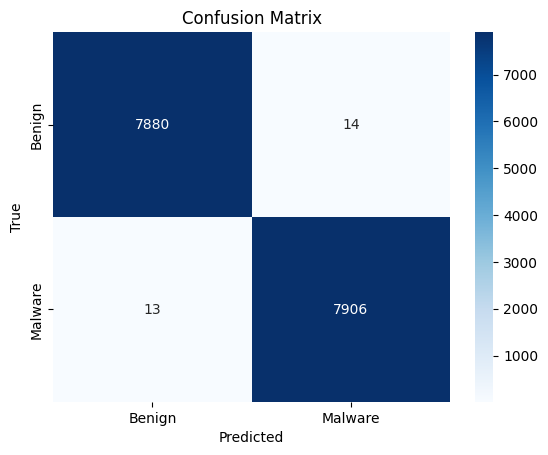

In [23]:
loss, acc , precision= model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test precision: {precision:.4f}")

# Classification Report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


  1/495 ━━━━━━━━━━━━━━━━━━━━ 1:22 166ms/step - accuracy: 1.0000 - loss: 3.0320e-04 - recall: 1.0000

 99/495 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.9986 - loss: 0.0028 - recall: 0.9997      

279/495 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.9986 - loss: 0.0031 - recall: 0.9992

457/495 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.9988 - loss: 0.0028 - recall: 0.9993

495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.9988 - loss: 0.0028 - recall: 0.9993


Test Loss: 0.0021
Test Accuracy: 0.9992
Test precision: 0.9994


  1/495 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step

257/495 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step

495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step

495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7894
         1.0       1.00      1.00      1.00      7919

    accuracy                           1.00     15813
   macro avg       1.00      1.00      1.00     15813
weighted avg       1.00      1.00      1.00     15813



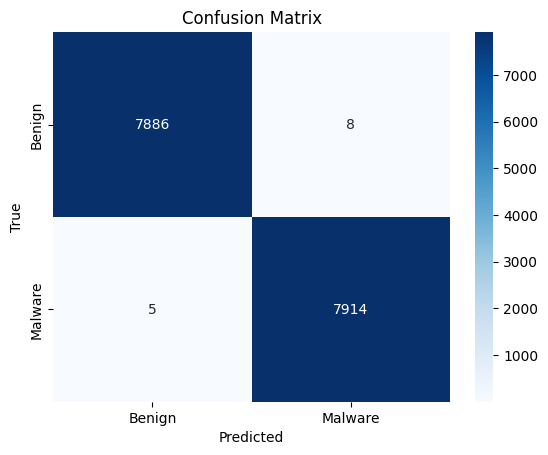

In [24]:
loss, acc , precision= lstm_bc.evaluate(X_test_lstm, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test precision: {precision:.4f}")

# Classification Report
y_pred = (lstm_bc.predict(X_test_lstm) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [25]:
# Save full model (preferred modern way)
model.save("global_FNN_model.keras")
lstm_bc.save("global_lstm_model.keras")